## NYPD Stop & Frisk Data Analysis Project

### Stop, Question and Frisk Data
This dataset is provided by the New York Police Department and contains information about the stop, question, and frisk policy implemented by the NYPD. It is a controversial and highly criticized policy in which a police officer suspecting someone of wrongdoing is able to stop them, question them, and search them for a weapon. The policy has been highly criticized for being a form of racial profiling.

The data that will be used in this analysis is from the year 2024. This data will be used to attempt to **predict whether someone will get frisked** based on the circumstances of the stop and the features of the individual suspect.

We would like to determine what features are most signifcant in determining whether a suspect gets frisked by an officer. Our results could be used to ensure fair and unbiased policing are practiced by the NYPD. This issue is especially vital to reduce police brutality and racial profiling.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('sqf-2024.xlsx')

In [4]:
df.head()

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,279772561,2024-01-01,01:58:00,2024,January,Monday,Based on Self Initiated,PO,46,SGT,...,(null),046,A,(null),1775 CLAY AVE,CLAY AVE,1010576,247603,PBBX,BRONX
1,279772564,2024-01-01,00:48:00,2024,January,Monday,Based on Self Initiated,PO,120,SGT,...,BLACK HOODIE SWEATSHIRT,067,D,(null),4515 FARRAGUT RD,FARRAGUT RD,1002798,171482,PBBS,BROOKLYN
2,279772565,2024-01-01,01:10:00,2024,January,Monday,Based on Radio Run,PO,871,SGT,...,SCAR ON LIP,068,D,(null),&&,NaN,977764,170616,PBBS,BROOKLYN
3,279772566,2024-01-01,01:10:00,2024,January,Monday,Based on Radio Run,PO,871,SGT,...,RED JACKET/ RED HAT,068,D,(null),&&,NaN,977764,170616,PBBS,BROOKLYN
4,279772567,2024-01-01,01:10:00,2024,January,Monday,Based on Radio Run,PO,871,SGT,...,BLACK JACKET,068,D,(null),&&,NaN,977764,170616,PBBS,BROOKLYN


In [5]:
df.shape

(25386, 81)

In [6]:
df=df.replace('(null)',np.nan)

/var/folders/66/0tz58h5d0sz2x3h46bjgz6580000gn/T/ipykernel_57438/4245612599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('(null)',np.nan)


In [7]:
target='FRISKED_FLAG'

In [8]:
df[target].value_counts()

FRISKED_FLAG
Y    15691
N     9695
Name: count, dtype: int64

In [9]:
def iqr_bounds(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

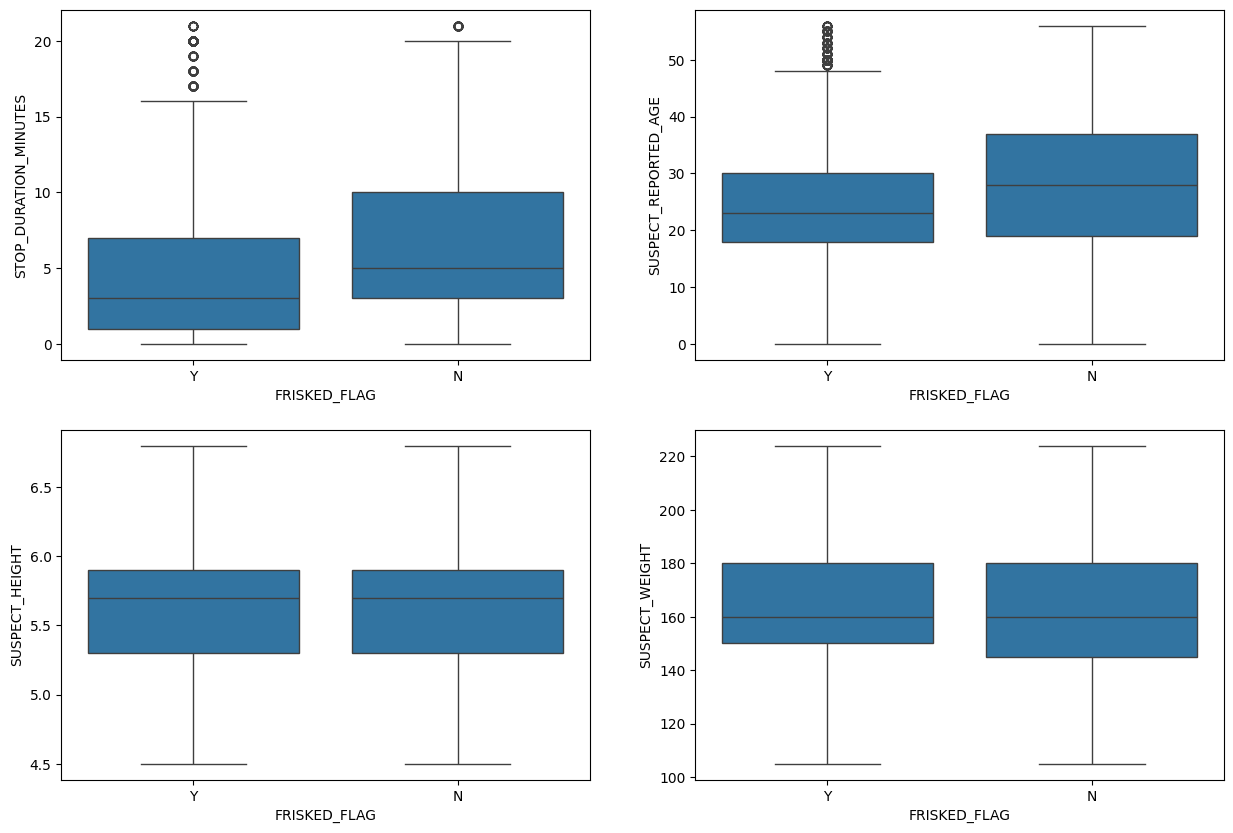

In [10]:
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
ax = axes.flat
numeric_feat = ['STOP_DURATION_MINUTES',
               'SUSPECT_REPORTED_AGE',
                'SUSPECT_HEIGHT',
                'SUSPECT_WEIGHT']
i=0
for feature in numeric_feat:
    df[feature] = df[feature].astype(float)
    l,u = iqr_bounds(df[feature].dropna())
    df_temp = df[(df[feature]>=l) & (df[feature]<u)]
    sns.boxplot(data=df_temp, x=target, y=feature,ax=ax[i])
    i+=1
plt.show()

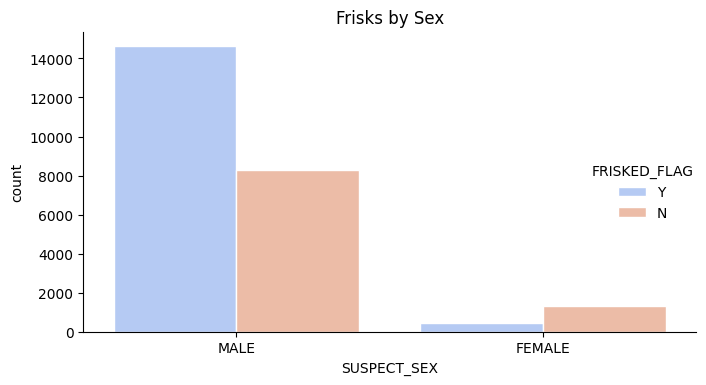

In [11]:
# Visualize frisks by sex
sns.catplot(x='SUSPECT_SEX', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='1')
plt.title('Frisks by Sex')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()

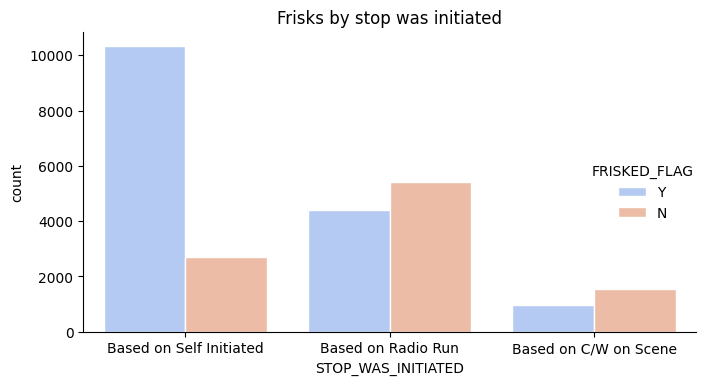

In [12]:
sns.catplot(x='STOP_WAS_INITIATED', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='1')
plt.title('Frisks by stop was initiated')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()



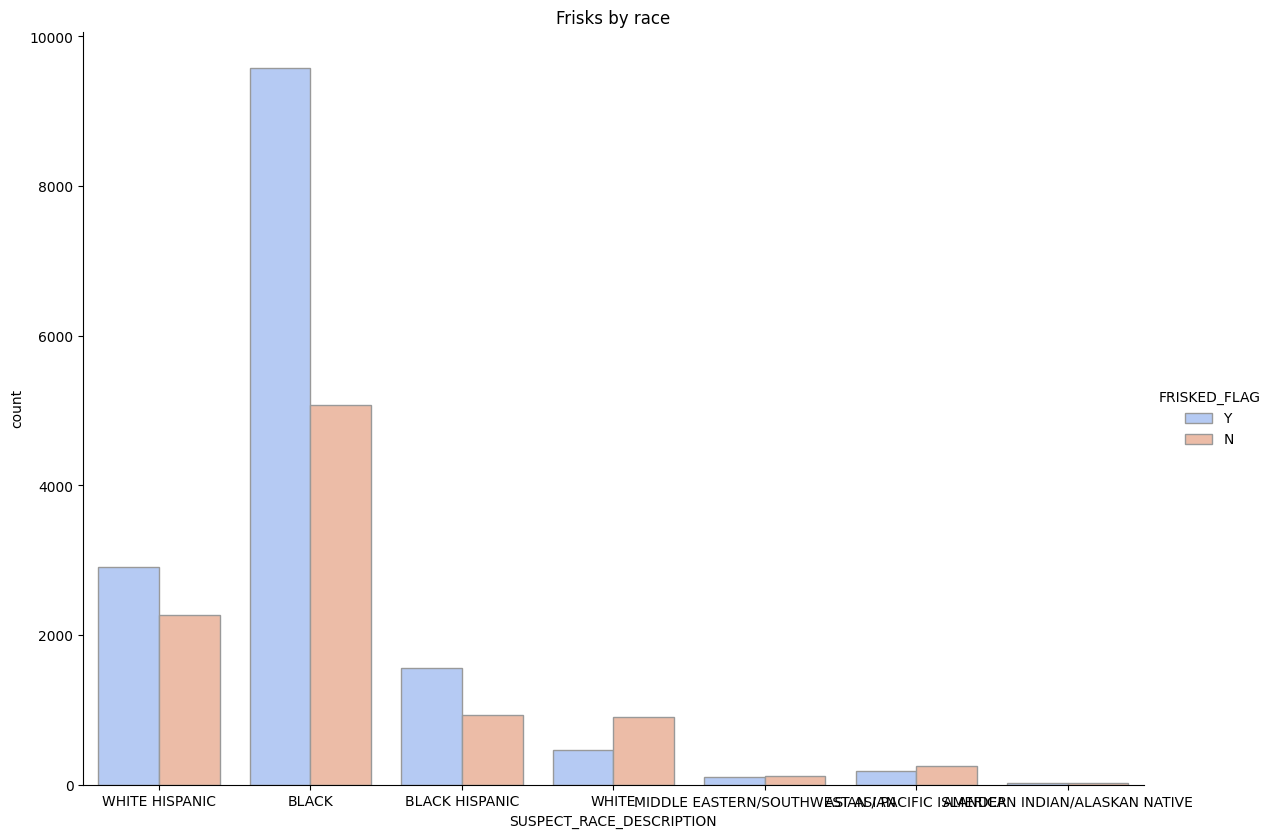

In [13]:
# Visualize frisks by race

sns.catplot(x='SUSPECT_RACE_DESCRIPTION', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='0.6',height=8.27, aspect=11.7/8.27)
plt.title('Frisks by race')
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()

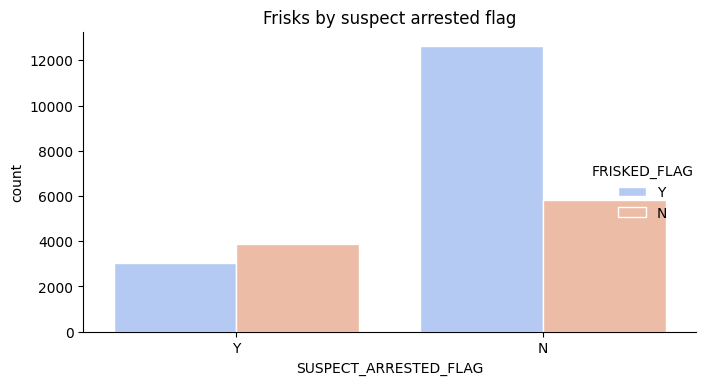

In [15]:
sns.catplot(x='SUSPECT_ARRESTED_FLAG', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='1')
plt.title('Frisks by suspect arrested flag')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()

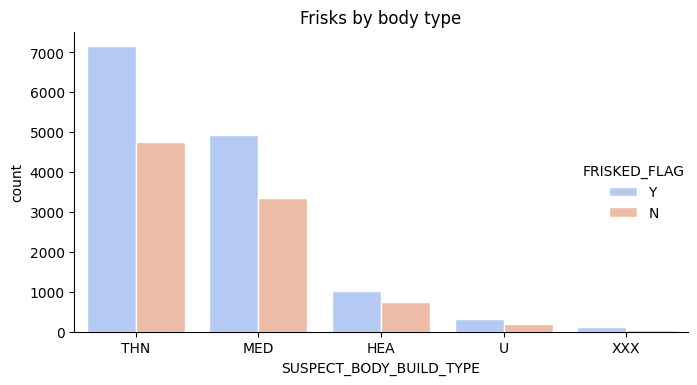

In [16]:
sns.catplot(x='SUSPECT_BODY_BUILD_TYPE', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='1')
plt.title('Frisks by body type')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()

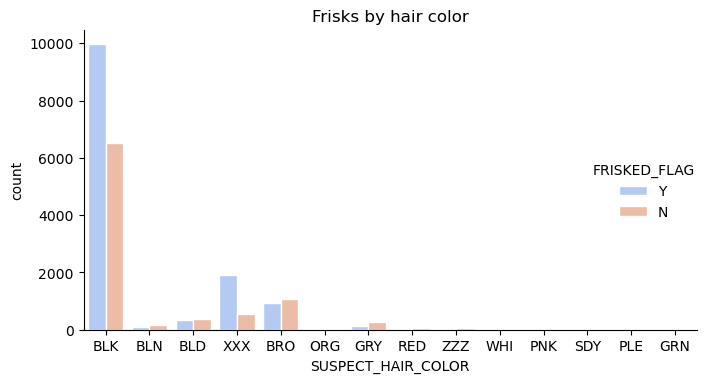

In [22]:
sns.catplot(x='SUSPECT_HAIR_COLOR', hue=target, data=df, kind='count', palette='coolwarm', edgecolor='1')
plt.title('Frisks by hair color')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=0.6, wspace=0.01, hspace=0.2)
plt.show()

In [17]:
df['SUSPECTED_CRIME_DESCRIPTION'].value_counts(normalize=True)#.head(10)
#plt.show()

SUSPECTED_CRIME_DESCRIPTION
CPW                                            0.534389
ROBBERY                                        0.090010
ASSAULT                                        0.076893
PETIT LARCENY                                  0.064721
BURGLARY                                       0.048019
OTHER                                          0.041873
GRAND LARCENY                                  0.026826
GRAND LARCENY AUTO                             0.026668
MENACING                                       0.020799
CRIMINAL TRESPASS                              0.016978
CRIMINAL MISCHIEF                              0.012763
RECKLESS ENDANGERMENT                          0.008942
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE    0.005515
CPSP                                           0.005003
CRIMINAL SALE OF CONTROLLED SUBSTANCE          0.003742
MAKING GRAFFITI                                0.002679
UNAUTHORIZED USE OF A VEHICLE                  0.002639
MURDER              

### Perform statistical test to identify the significance of the variables

In [20]:
def get_num_cols(data):
    cols = data.columns
    num_cols = data._get_numeric_data().columns
    return num_cols
def perform_T_test(df):
    num_cols = get_num_cols(df)
    
    frisked_Y = df[df[target]=='Y']
    frisked_N = df[df[target]=='N']
    
    from scipy.stats import ttest_ind
    t_scores = {}
    for col in num_cols:
        if col not in t_scores:
            t_scores[col] = []
            t_scores[col].append(ttest_ind(frisked_Y[col].dropna(), frisked_N[col].dropna()).pvalue)
    #print(t_scores)
    return t_scores

In [22]:
perform_T_test(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


{'STOP_ID': [0.20282694304809853],
 'YEAR2': [nan],
 'ISSUING_OFFICER_COMMAND_CODE': [6.81201804266581e-17],
 'SUPERVISING_OFFICER_COMMAND_CODE': [2.3420585802383573e-14],
 'OBSERVED_DURATION_MINUTES': [0.7289952457699477],
 'STOP_DURATION_MINUTES': [5.996641621086578e-98],
 'SUSPECT_REPORTED_AGE': [2.58962332710029e-179],
 'SUSPECT_HEIGHT': [1.451731158104138e-07],
 'SUSPECT_WEIGHT': [1.198047449355591e-13]}

In [24]:
def get_categorical_columns(df):
    # Get the columns that are of type 'object' or 'category'
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns


from sklearn.preprocessing import LabelEncoder
def perform_chi_sq_test(df):
    cat_cols = get_categorical_columns(df)
    label_encoder = LabelEncoder()
    for col in cat_cols:
        if col != target:
            df[col] = label_encoder.fit_transform(df[col])
    df = df.dropna()   
    X = df.drop(target, axis=1)
    y = df[target]
    
    from sklearn.feature_selection import chi2
    chi_score = chi2(X,y)
    p_vals = pd.Series(chi_score[1], index = X.columns)
    p_vals.sort_values(ascending=False, inplace=True)
    return p_vals

In [25]:
chi_res = perform_chi_sq_test(df)

In [26]:
chi_res.head(25)

YEAR2                                           1.000000
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG               0.993279
PHYSICAL_FORCE_WEAPON_IMPACT_FLAG               0.985186
ID_CARD_IDENTIFIES_OFFICER_FLAG                 0.923484
PHYSICAL_FORCE_CEW_FLAG                         0.882713
SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG    0.850808
SUSPECTS_ACTIONS_LOOKOUT_FLAG                   0.815486
MONTH2                                          0.790574
OFFICER_EXPLAINED_STOP_FLAG                     0.784768
SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG         0.665156
OTHER_WEAPON_FLAG                               0.615220
VERBAL_IDENTIFIES_OFFICER_FLAG                  0.585734
SHIELD_IDENTIFIES_OFFICER_FLAG                  0.585361
OFFICER_IN_UNIFORM_FLAG                         0.552717
PHYSICAL_FORCE_OTHER_FLAG                       0.517134
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION          0.405969
SUSPECT_HEIGHT                                  0.376396
SUSPECTS_ACTIONS_CASING_FLAG   

In [27]:
drop_cols = list(chi_res.head(25).index) + ['STOP_ID','STOP_FRISK_DATE']

In [28]:
df = df.drop(columns=drop_cols)
df.shape

(25386, 54)

In [29]:
# Check null values in data
null_df = df.isna().sum().reset_index()
null_df.columns = ['Features','Null']
null_df = null_df.sort_values(by=['Null'],ascending=False)
null_df

,Features,Null
41,SUSPECT_WEIGHT,3792
38,SUSPECT_REPORTED_AGE,3503
40,SUSPECT_RACE_DESCRIPTION,0
29,BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY...,0
30,SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG,0
31,SUSPECTS_ACTIONS_DECRIPTION_FLAG,0
32,SUSPECTS_ACTIONS_OTHER_FLAG,0
33,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,0
34,SEARCH_BASIS_HARD_OBJECT_FLAG,0
35,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,0


In [56]:
# fill null value by mean
df['SUSPECT_WEIGHT'] = df['SUSPECT_WEIGHT'].fillna(df['SUSPECT_WEIGHT'].mean())
df['SUSPECT_REPORTED_AGE'] = df['SUSPECT_REPORTED_AGE'].fillna(df['SUSPECT_REPORTED_AGE'].mean())

In [58]:
df.to_excel('final_data.xlsx',index=False)